In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('cleaned_aita.csv')

In [2]:
df['verdict'].unique()

array(['nta', 'yta', 'unknown'], dtype=object)

In [ ]:
# we don't want unknowns
df = df[df['verdict'] != 'unknown']
# make verdict binary
df['verdict'] = df['verdict'].map({'nta': 0, 'yta': 1})

In [4]:
df['verdict'].unique()

array([0, 1])

Text(0.5, 1.0, 'Distribution of Verdicts')

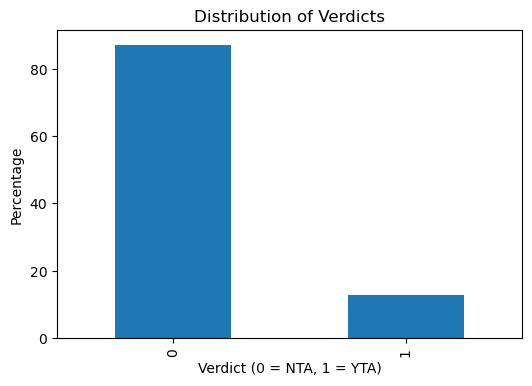

In [ ]:
import matplotlib.pyplot as plt

# let's see distribution of yta and nta
verdict_counts = df['verdict'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
verdict_counts.plot(kind='bar')

plt.xlabel('Verdict (0 = NTA, 1 = YTA)')
plt.ylabel('Percentage')
plt.title('Distribution of Verdicts')

In [6]:
df.head()

,title,title.1,body,top_comment_1,top_comment_2,top_comment_3,top_comment_4,top_comment_5,top_comment_6,top_comment_7,top_comment_8,top_comment_9,top_comment_10,verdict
0,aita for not taking one of my players complain...,aita for not taking one of my players complain...,i dm for a group of 5 people will lorraine ben...,nta listen youre the dm and seen as the figure...,nta yet because you are taking it seriously th...,nta i think you should talk with her a little ...,nta if she feels uncomfortable because shes in...,nta sounds like holly is being a territorial s...,nah but theres an easy way to solve it dump th...,nta it sounds like the person who made the com...,i would say nah i think holly is certainly ent...,nta likeyoure in charge of the game but youre ...,nah holly has issues of her own most likely an...,0
1,aita for not going to my stepsisters graduatio...,NaN,i 18m just graduated grade 12 this year my you...,nta my response would be thank you for the inv...,so nta and dont go i have never heard of a 7th...,nta what the hell is your step mum messaging y...,nta dont go you would be miserable and angry s...,nta id lie my ass off and say i cant attend be...,nta and i have to say youre being the only res...,nta now that you are 18 you get to pick who yo...,nta you dont feel like partying and are reason...,nta your stepmom and dad are definitely ahs an...,nta they treat you very badly that is a simple...,0
2,aita for not paying half,NaN,a new friend of mine and i discovered we have ...,nta sorry thats not the scope of birthday cele...,nta you dont plan an intimate party with anoth...,nta stop with the jade justify argue defend ex...,nta do not feel bad for standing your ground w...,nta she obviously just wanted to stick you wit...,nta paying for her mistakes doesnt make you an...,nta she is trying to use you and knew it befor...,nta you signed up for an intimate party thats ...,you said x she agreed and now wants to to pay ...,nta i think the number of people and maximum b...,0
3,aita for potentially getting my upstairs neigh...,NaN,im really conflicted with this so id like some...,nta you are well within your rights to complai...,nta this is not you being petty im surprised m...,sorry but you dont move into an apartment comp...,nta water overflowing into your apartment is d...,nta maybe theyve received similar warning and ...,nta you arent getting anyone evicted they are ...,its super weird that management would send you...,nta you need to look as the kids have nothing ...,nta its not you who is making them homeless it...,nta repeated bathtub overflows caused a massiv...,0
4,aita for demanding to go through my partners p...,aita for demanding to go through my partners p...,for context weve been dating for 15 years also...,nta i feel like most people would have gone sn...,nta if there was nothing to hide i wouldve sho...,man this is a tough one to be honest im really...,yta either trust her or dont and decide where ...,nta it honestly blows me away how many people ...,yta simply for demanding to go through her pho...,nta shes hiding something your lack of trust i...,yta 15 years together with no stated reasons o...,esh its a really crappy situation but if you t...,esh these commentors act like no one cheats or...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# vectorize the title and body
vectorizer = TfidfVectorizer(max_features=50)
X = vectorizer.fit_transform(df['title'] + " " + df['body']).toarray()
y = df['verdict']
# dataset was highly unbalanced, sotry to make balanaced
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# train test split to train models
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [ ]:
# define models and train them
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Support Vector Classifier': SVC(kernel='linear', random_state=42),
    'KMeans Classifier': KMeans(n_clusters=2, random_state=42)  # KMeans doesn't require labels for fitting
}
results = {}
for name, model in models.items():
    if name == 'KMeans Classifier':
        model.fit(X_train)  # unsupervised method
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    results[name] = classification_report(y_test, y_pred, output_dict=True)


In [9]:
results

{'Logistic Regression': {'0': {'precision': 0.6349656009712666,
   'recall': 0.605012853470437,
   'f1-score': 0.6196274600144803,
   'support': 7780.0},
  '1': {'precision': 0.6227596366314756,
   'recall': 0.6521403779406093,
   'f1-score': 0.6371114599686029,
   'support': 7779.0},
  'accuracy': 0.6285751012275853,
  'macro avg': {'precision': 0.6288626188013711,
   'recall': 0.6285766157055231,
   'f1-score': 0.6283694599915416,
   'support': 15559.0},
  'weighted avg': {'precision': 0.6288630110490843,
   'recall': 0.6285751012275853,
   'f1-score': 0.628368898130241,
   'support': 15559.0}},
 'Support Vector Classifier': {'0': {'precision': 0.642816742081448,
   'recall': 0.5843187660668381,
   'f1-score': 0.6121734446539187,
   'support': 7780.0},
  '1': {'precision': 0.6189466242488512,
   'recall': 0.6752795989201696,
   'f1-score': 0.6458871265215788,
   'support': 7779.0},
  'accuracy': 0.6297962593997044,
  'macro avg': {'precision': 0.6308816831651496,
   'recall': 0.62979

In [ ]:
print(results['Logistic Regression'] ) 
classifiers = ['Logistic Regression', 'Support Vector Classifier', 'KMeans Classifier']
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
metrics = ['precision','recall', 'f1-score']
# let's show all the stats
for model in classifiers:
    plt.figure(figsize=(12, 6))
    # class 0 and class 1 data
    values_0 = [results[model].get('0',{}).get(metric,0) for metric in metrics]
    values_1 = [results[model].get('1', {}).get(metric, 0) for metric in metrics]
    # plot the barz
    bar_width = 0.35
    x = range(len(metrics ))
    bars_0 = plt.bar([i -bar_width / 2 for i in x], values_0, bar_width, label='NTA', color=colors[0])
    bars_1 = plt.bar([i + bar_width /2 for i in x], values_1, bar_width, label='YTA',color=colors[1])

    # put valu on top so easier to view
    for bars in [bars_0, bars_1]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval,2), va='bottom',ha='center')
    plt.title(f'Performance Metrics for {model}')
    plt.xticks(x, metrics)
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.legend()
    # filename = f'{model.replace(" ", "_")}_metrics.png'
    # plt.savefig(filename, bbox_inches='tight')
    plt.close()  


{'0': {'precision': 0.6349656009712666, 'recall': 0.605012853470437, 'f1-score': 0.6196274600144803, 'support': 7780.0}, '1': {'precision': 0.6227596366314756, 'recall': 0.6521403779406093, 'f1-score': 0.6371114599686029, 'support': 7779.0}, 'accuracy': 0.6285751012275853, 'macro avg': {'precision': 0.6288626188013711, 'recall': 0.6285766157055231, 'f1-score': 0.6283694599915416, 'support': 15559.0}, 'weighted avg': {'precision': 0.6288630110490843, 'recall': 0.6285751012275853, 'f1-score': 0.628368898130241, 'support': 15559.0}}
